In [1]:
!pip install scipy

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy.stats import pearsonr, spearmanr

In [4]:
data = pd.read_csv("E:\\2020\\Quarantine\\Python\\bike_sharing_daily.csv", index_col=0)#index_col is used to remove indexing here
data.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,,
1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [5]:
#data.columns
# DatetimeIndex(), to_datetime is used to convert to date time format
data['dteday'] = pd.to_datetime(data['dteday'])
data['dteday'] 
data['dteday'] = pd.DatetimeIndex(data['dteday'])
data['dteday'] 

instant
1     2011-01-01
2     2011-01-02
3     2011-01-03
4     2011-01-04
5     2011-01-05
         ...    
727   2012-12-27
728   2012-12-28
729   2012-12-29
730   2012-12-30
731   2012-12-31
Name: dteday, Length: 731, dtype: datetime64[ns]

In [16]:
np.corrcoef(data['temp'] ,data['cnt'] )  #Matric giving statistical relation b/w temp and no. of bikes rented
#Another way
data['temp'].corr(data['cnt']) #correlation value

0.6274940090334918

In [17]:
pearsonr(data['temp'],data['cnt']) #give (coefficient of correlation, p-value) i.e.p-value tells the significance level

(0.627494009033492, 2.8106223975907754e-81)

In [6]:
spearmanr(data['temp'],data['cnt']) #Spersman work with rank od data not with actual data
                                    #Typically used with ordinal data
                                    #Ordinal data: Catagorical but can be expressed numercally
                                        #Eg: High<- 1 Medium <- 0.5 Low <- 0 we have groups but also numeric

SpearmanrResult(correlation=0.6220344732276183, pvalue=1.674554642260452e-79)

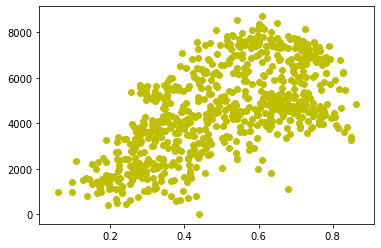

In [11]:
plt.scatter(data['temp'],data['cnt'],c='y')

In [12]:
data.columns

Index(['dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual',
       'registered', 'cnt'],
      dtype='object')

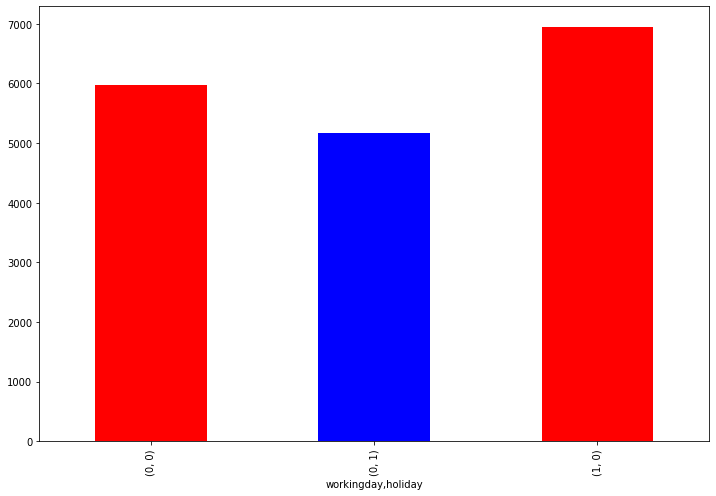

In [24]:
#max count of bikes rented on working day/ not 
#By Registered User
data.groupby('workingday')['registered'].max().plot(kind= 'bar',figsize =(12,8), color=['r','b'])
                            #Singlr group by
    
#data.groupby(['workingday','holiday'])['registered'].max().plot(kind= 'bar',figsize =(12,8), color=['r','b'] )
                            #multiple group by

In [17]:
data.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,,
1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


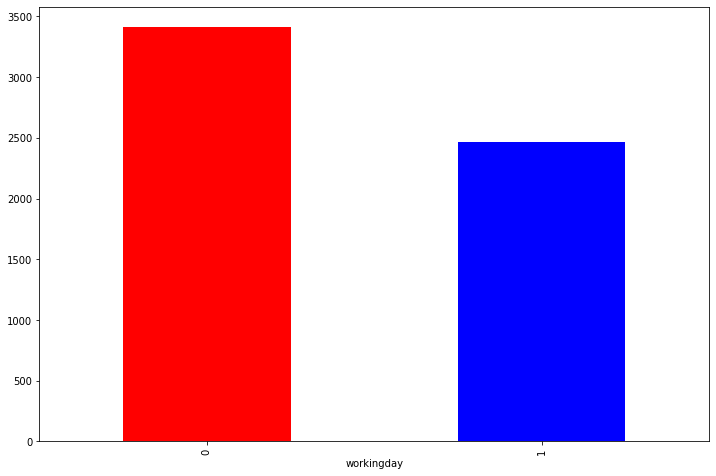

In [26]:
#By casual user
data.groupby('workingday').max()['casual'].plot(kind= 'bar',figsize =(12,8), color=['r','b'] )

In [30]:
print(data['workingday'].corr(data['casual']))
print(data['workingday'].corr(data['registered']))

-0.5180441913348246
0.3039071170459171


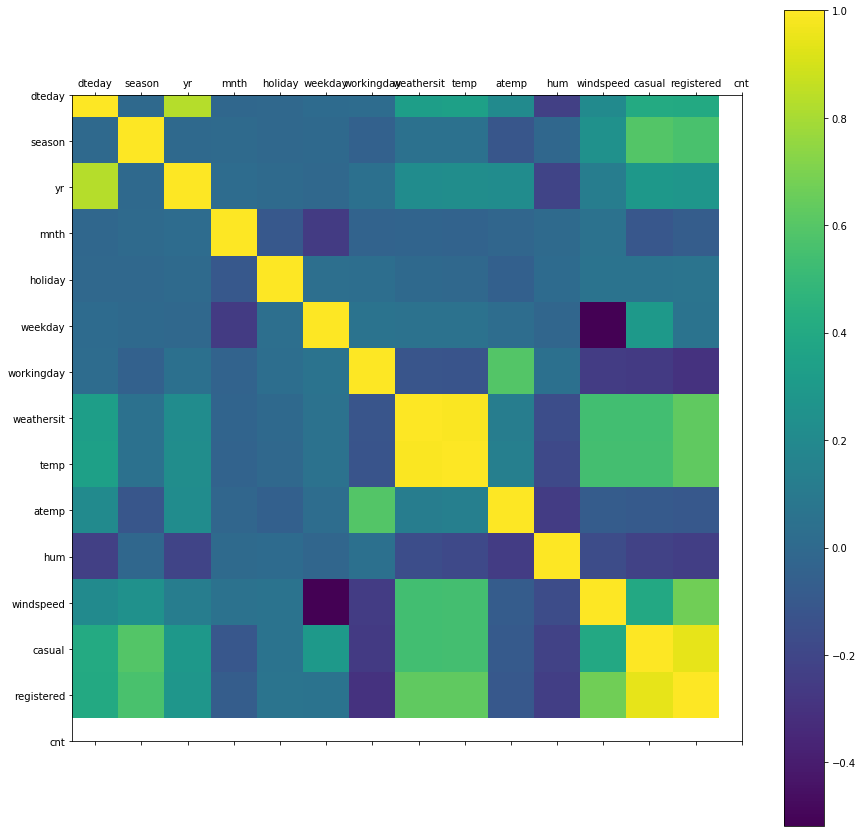

In [35]:
plt.figure(figsize=(15,15))
plt.matshow(data.corr(), fignum=False, aspect='equal')
columns = len(data.columns)
plt.xticks(range(columns), data.columns)
plt.yticks(range(columns), data.columns)
plt.colorbar()
plt.show()

In [36]:
!pip install yellowbrick

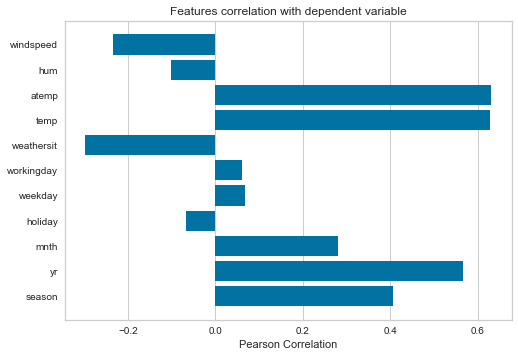

In [49]:
#developing tagret
target = data['cnt']
#feature required
features = data.drop(['cnt','casual','registered','dteday'], axis=1)  
#features = data.drop(['dteday'], axis=1)    #Removing date bz it cannot correlate with 3 diff feature in 1 date

from yellowbrick.target import FeatureCorrelation

feature_name = list(features.columns)

#Visulization
visulizer = FeatureCorrelation(labels = feature_name)

#fitting it with target and feature
visulizer.fit(features, target)
visulizer.poof()  #Display the feature Correlation

